## Getting the Data

In [2]:
import os
import tarfile
import urllib

In [3]:
#  A Cool way to download the dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # navigating to the correct file in the repo

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    # os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
# fetch_housing_data()


# 1 Loading the Data

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/U

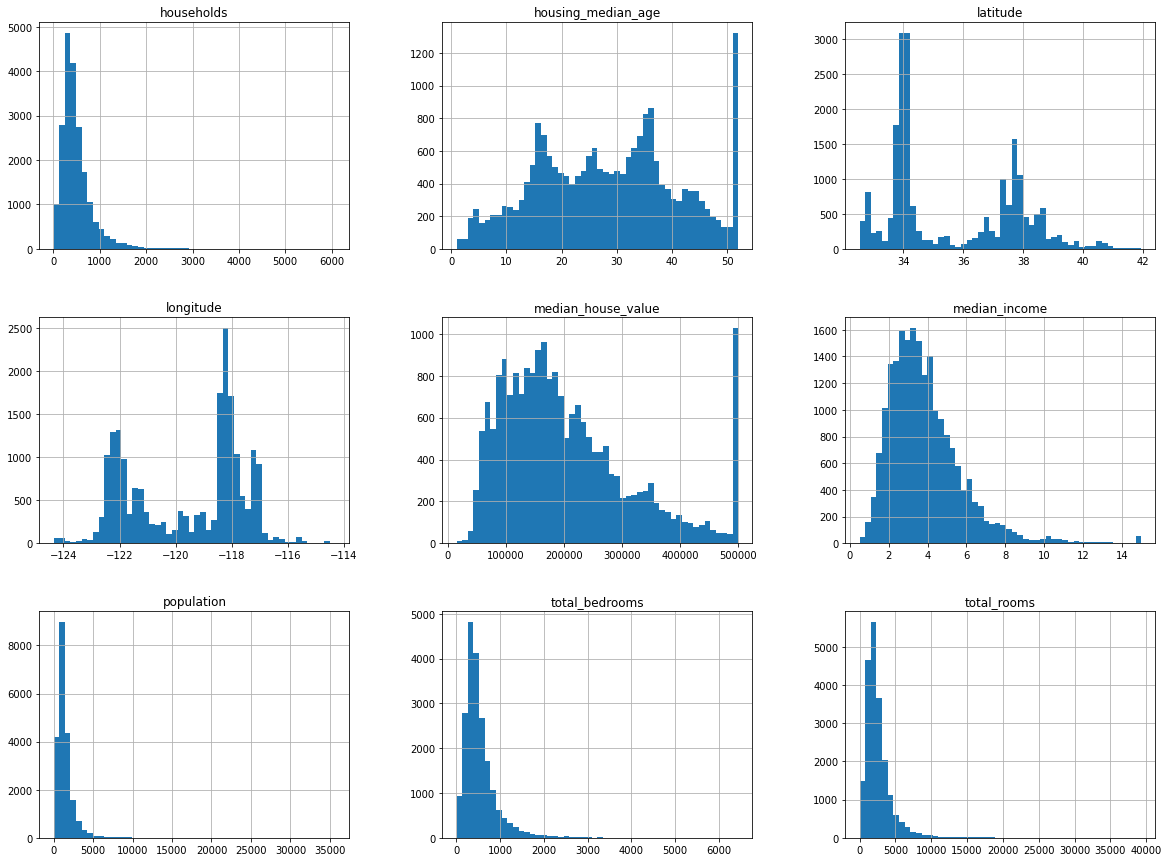

In [12]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
# histogram for every feature

### More bell shaped distributions is better. These are tail heavy - will be difficult for the model to learn.

In [13]:
# Response var = median_housing_value

## Splitting into train and test set

In [14]:
# Some new ways :


In [15]:
import numpy as np

In [16]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [17]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [18]:
# Problem with this is that in subsequent runs, the whole dataset will be shown, which needs to be avoided. We want the test set to be consistent in multiple runs.
#* One way to do that is using a hashed identifier (something unique from the attributes) for each test set
# => The other way will be using the inbuilt function

### Random Sampling

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified Sampling
#### Need:
We want the data to be representative of all of the stratas of the complete dataset. 
Given that mean_income is an importatn attribute, we will divide the dataset into categories (stratas) in order to have an idea of the ratios in which the data is divided into these stratas then, that ratios should be used to create any test dataset, etc.


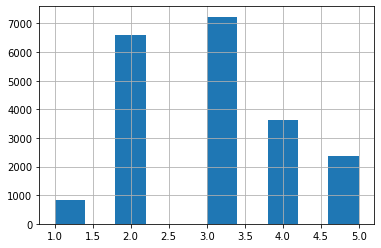

In [20]:
housing['income_cat'] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6,np.inf], labels = [1,2,3,4,5])
# it goes till 6 then till infinity because as sean in the hsit of the dataset, most of the values cluster between 1.5 and 6
housing["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# n_splits= number of re-shuffling and splitting iterations
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set, strat_test_set = housing.iloc[train_index], housing.iloc[test_index]

In [22]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# 2 Discovering and Visualising Data to Gain insights

In [24]:
housing = strat_train_set.copy()

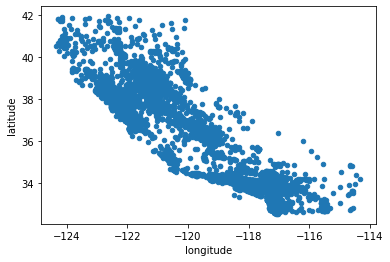

In [25]:
housing.plot(kind="scatter", x = "longitude", y = "latitude")
# using scatter plot coz geographical data!

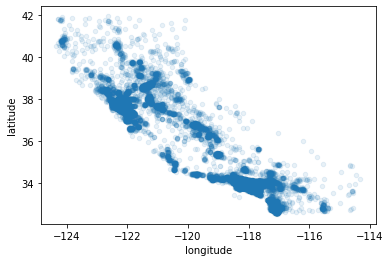

In [26]:
# This looks llike california (goal achieved to some extent)
# To get the points with high density, set alpha value
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha=0.1)


/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/U

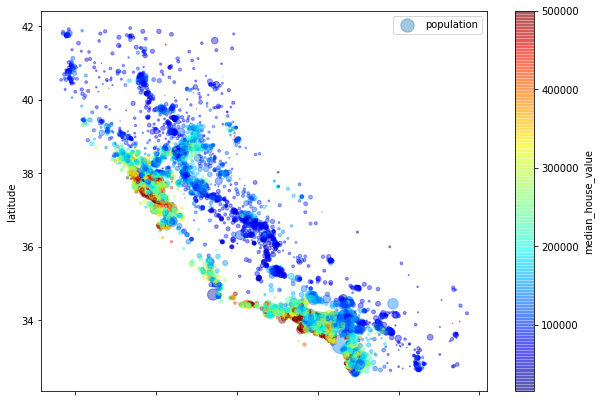

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population", figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [28]:
# Points to notice:
# 1. Property prices near the cost are high 
# 2. But not in northern California
# 3. Densely populated areas are highly priced.

## Correlation

In [29]:
#Using df.corr()

In [30]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [31]:
# Another way to check correlation is to plot the attributes against each other

In [32]:
from pandas.plotting import scatter_matrix

In [33]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sahajadlakha/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/U

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95fad11b20>,
      dtype=object)

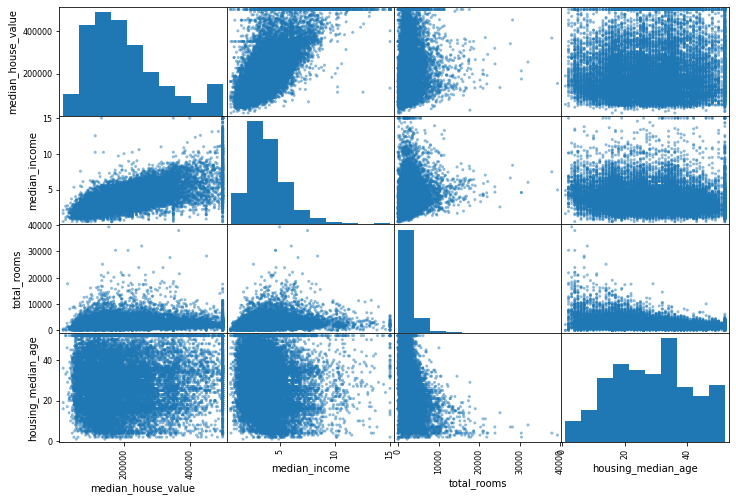

In [34]:
attr = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attr], figsize=(12,8))

# Attribute Combinations
Number of bedrooms is pointless to consider but if considered as number of bedrooms per household!

In [35]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [36]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 3 Preparing Data for ML Algorithm

In [37]:
# Reset the df and seperate attributes from target variable
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In [38]:
# 1. handling missing Data

In [39]:
# housing.dropna(subset = ["total_bedrooms"]) # OPtion 1 
# housing.drop("total_bedrooms", axis = 1) # OPtion 2
# median = housing["total_bedrooms"].medain() # OPtion 3 
# housing["total_bedrooms"].fillna(median, inplace = True)

In [40]:
# Option 4 - using SimpleImputer
from sklearn.impute import SimpleImputer
# 1
imputer = SimpleImputer(strategy = "median")

# seperating numeric attrs
housing_num = housing.drop("ocean_proximity", axis = 1)
# 2
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [41]:
# Getting all the median values:
print(imputer.statistics_)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [42]:
# 3
X = imputer.transform(housing_num)

In [43]:
# Putting into PD df from NP array
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)


## Handling text and Categorical Data

In [44]:
housing_cat = housing[["ocean_proximity"]]
housing[["ocean_proximity"]].head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


### Ordinal Encoding

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_ # learned parameter

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
ordinal_encoder.categories # hyperparameter

'auto'

### => Problem in ordinal encoding: Two nearby values will be considered closer than others 

### One Hot Encoding
Binar values for each category

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
# This will take up too much memory just to store more 0s than 1s so convert it to a dense Numpy array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
from learning import * # helper file - contains important codes

In [54]:
# Custom Transformer to add attributes to the housing dataset
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [55]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

## Feature Scaling

In [56]:
# # Scaling the attributes to a same level
# 1. Min-Max
# 2. Standardisation

## Pipelines

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [58]:
# Helps in preserving the order of multiple tasks that need to be prerformed

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
]) # Returns a transformer

In [59]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

## Inbuilt Column transformer that handles numeric and categorical columns

In [60]:
from sklearn.compose import ColumnTransformer

In [61]:
num_attribs = list(housing_num) # nice way to get the attributes list from a dataframe
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    #  (name, transformer, columns)
])

In [62]:
housing_prepared = full_pipeline.fit_transform(housing)

# 4 Select a Model and train it.

## 1 Linear Regression

In [63]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression


In [64]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation

In [65]:
# Evaluation
sample = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_prepared = full_pipeline.transform(sample)
print("Predictions: ", lin_reg.predict(sample_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [66]:
print("Labels: ", list(sample_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [67]:
# Metrics
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [68]:
# This error is in dollars. Most prices are between 120,000. and 265,000 dollars so, this is not a good sign

## 2. Decision Tree Regressor - A More Complex Model

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Evaluation

In [71]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [72]:
# Obviously something is wrong, lets evaluate in a better way

## Cross-Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)


In [75]:
# Display cross_valid_score helper function

def display_scores(scores):
    print("scores: ", scores)
    print("scores mean: ", scores.mean())
    print("standard deviation: ", scores.std())

In [76]:
display_scores(tree_rmse_scores) # Worse than Linear Regression

scores:  [68985.68200683 67678.84483843 69879.12931559 68009.58119276
 71675.33364991 75026.38507206 70736.65522747 71531.53748466
 77340.32063657 70186.14830988]
scores mean:  71104.96177341593
standard deviation:  2881.9800447244315


In [77]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [78]:
display_scores(lin_rmse_scores) # So it is clear that Decision Tree model is overfitting so badly that it is performing worse than the linear regression model

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
scores mean:  69052.46136345083
standard deviation:  2731.674001798344


## 3 Random forest regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
for_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10 )
forest_rmse_scores = np.sqrt(-for_scores)

In [82]:
display_scores(forest_rmse_scores) # Performing better than the other 2

scores:  [49543.94550024 47682.13160241 50167.07935368 52190.60421573
 49767.95867911 53757.07284705 49264.7809741  47508.96457631
 53083.45963321 50067.84568805]
scores mean:  50303.3843069887
standard deviation:  1997.8566509172572


## Saving the model

In [83]:
import joblib

In [84]:
joblib.dump(forest_reg, "housing_forest_regressor_model.pkl")

['housing_forest_regressor_model.pkl']

# 5 Fine Tune your Model

### -1 Grid search

In [86]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = [
    {
        'n_estimators': [3,10,30],
        'max_features': [2,4,6,8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3,10],
        'max_features': [2,3,4]
    }
] # These params are discussed in a later chapter

grid_search= GridSearchCV(forest_reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)
# Takes a lot of time

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [95]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [96]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63533.69749496078 {'max_features': 2, 'n_estimators': 3}
55851.6725231697 {'max_features': 2, 'n_estimators': 10}
52991.841550694764 {'max_features': 2, 'n_estimators': 30}
60197.321085816555 {'max_features': 4, 'n_estimators': 3}
52904.41952929864 {'max_features': 4, 'n_estimators': 10}
50518.3372156473 {'max_features': 4, 'n_estimators': 30}
59125.983660220285 {'max_features': 6, 'n_estimators': 3}
51959.68542906087 {'max_features': 6, 'n_estimators': 10}
50239.179429199154 {'max_features': 6, 'n_estimators': 30}
58405.163453451074 {'max_features': 8, 'n_estimators': 3}
51959.4142854373 {'max_features': 8, 'n_estimators': 10}
49966.25485001821 {'max_features': 8, 'n_estimators': 30}
62385.27569611626 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54838.46519809214 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59334.65078443549 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52340.0475059567 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Output(best): max_features: 8, n_estimators = 30

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.92839620e-02, 6.67238250e-02, 4.18490588e-02, 1.50628548e-02,
       1.56725051e-02, 1.55014406e-02, 1.37706948e-02, 3.71048540e-01,
       5.57442362e-02, 1.09691842e-01, 5.21109358e-02, 8.79967535e-03,
       1.59405779e-01, 1.15599950e-04, 2.38853748e-03, 2.83051248e-03])

### -2 Randomized Search
* For a larger hyperparameter space
* performs better in such situatiosn than grid search
* In every iteration a random value is chosen for every hyperparameter and then the best ones are picked

=> Advantage of setting the budget by setting the number of iterations

### -3 Ensemble Methods
* combine the models that performed best

## Evaluate on Test Set

In [104]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [105]:
X_test_prepared = full_pipeline.transform(X_test) # transform and not fit_transform because i don't want to fit the test data


In [107]:
final_predictions = final_model.predict(X_test_prepared)

In [112]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [114]:
display_scores(final_rmse)

scores:  48033.601156788485
scores mean:  48033.601156788485
standard deviation:  0.0


### => Such point estimate for the generalization error might not be convinsing so, let's create a 95% confidence interval for it using scipy

In [115]:
from scipy import stats

In [116]:
confidence = 0.95

In [117]:
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([45979.79281044, 50003.12323533])

# 6 Present your Solution

# 7 Launch, Monitor and maintain your system.